<h1>Вовед</h1>

Имаме податоци кои се класифицирани дали пациентите имаат срцеви заболувања или не според карактеристиките во него. Ќе се обидам да ги искористам овие податоци за да создадам модел што ќе се обиде да предвиди дали пациентот има оваа болест или не. Ќе користам алгоритам за логистичка регресија (класификација).

In [1]:
#Првенствено ги внесуваме сите пакети што ќе ни бидат потребни за анализа на овој датасет

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import os
import os
print(os.listdir("../input"))

# Последниве три реда се автоматски генерирани од Kaggle

['heart-disease-uci']


<h1>Читање на податоците</h1>

In [2]:
# Ги читаме податоците
heart = pd.read_csv("../input/heart-disease-uci/heart.csv")

In [3]:
# Првите 5 реда од податоците
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* Податоците содржат:
* 
* age - години
* sex - (1 = машко; 0 = женско)
* cp - вид на болка во градите(chest pain)
* trestbps - крвен притисок при одморање (во mm Hg при прием во болница)
* chol - холестерол во mg/dl
* fbs - (шеќер во крвта > 120 mg/dl) (1 = точно; 0 = неточно) (кратенка од fasting blood sugar)
* restecg - резултати од електрокардиограм при одморање
* thalach - максимален пулс
* exang - ангина индуцирана при вежбање (1 = да; 0 = не) (exercise induced angina)
* oldpeak - ST депресија индуцирана од вежбање релативно со одмор
* slope - наклон на врвот на ST сегментот при вежбање
* ca - број на главни крвни садови обоени со флуороскопија (0-3) 
* thal - 3 = нормално; 6 = поправен дефект; 7 = реверзибилен дефект
* target - have disease or not (1=yes, 0=no)

In [4]:
#Број на луѓе што ја имаат/немаат заболување
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

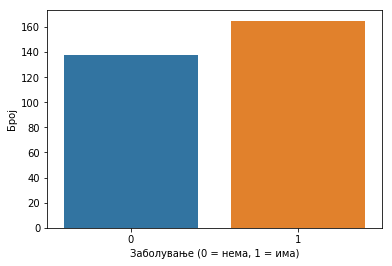

In [5]:
# На график ги прикажуваме бројот на луѓето што немаат и имаат заболување
sns.countplot(x="target", data=heart)
plt.xlabel("Заболување (0 = нема, 1 = има)")
plt.ylabel('Број')
plt.show()

In [6]:
# Го наоѓаме процентот на пациенти што имаат и немаат заболување
nema_bolest = len(heart[heart.target == 0])
ima_bolest = len(heart[heart.target == 1])
broj_na_zaboleni = len(heart.target)
print("Процент на пациенти што немаат заболување: {:.2f}%".format((nema_bolest / broj_na_zaboleni)*100))
print("Процент на пациенти што имаат заболување: {:.2f}%".format((ima_bolest / broj_na_zaboleni)*100))

Процент на пациенти што немаат заболување: 45.54%
Процент на пациенти што имаат заболување: 54.46%


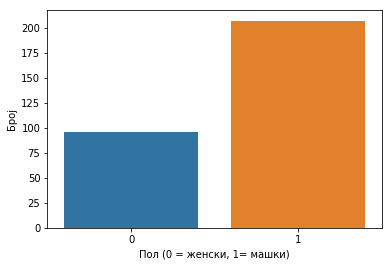

In [7]:
# Ги претставуваме машките и женските пациенти на график
sns.countplot(x='sex', data=heart)
plt.xlabel("Пол (0 = женски, 1= машки)")
plt.ylabel('Број')
plt.show()

In [8]:
# Го наоѓаме процентот на машки и женски пациенти
broj_zenski = len(heart[heart.sex == 0])
broj_maski = len(heart[heart.sex == 1])
broj_pacienti = len(heart.sex)
print("Процент на женски пациенти: {:.2f}%".format((broj_zenski / broj_pacienti)*100))
print("Процент на машки пациенти: {:.2f}%".format((broj_maski / broj_pacienti)*100))

Процент на женски пациенти: 31.68%
Процент на машки пациенти: 68.32%


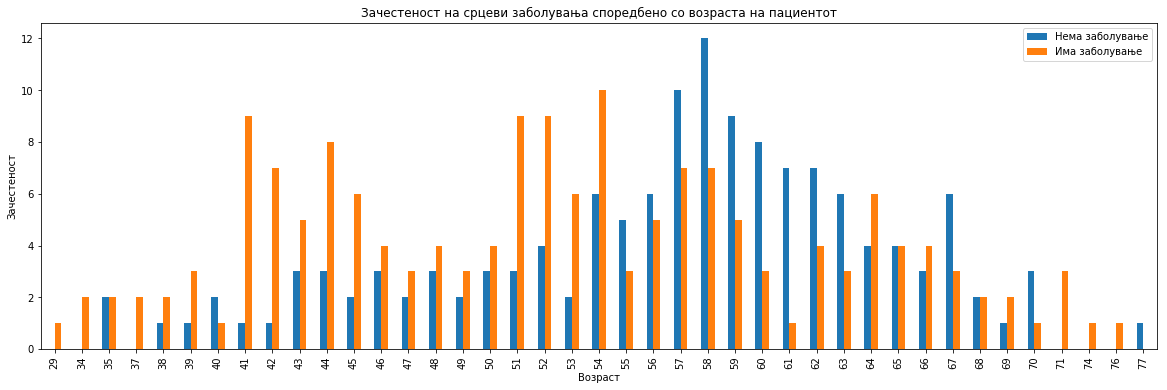

In [9]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Зачестеност на срцеви заболувања споредбено со возраста на пациентот')
plt.xlabel('Возраст')
plt.ylabel('Зачестеност')
plt.legend(["Нема заболување", "Има заболување "])
plt.show()

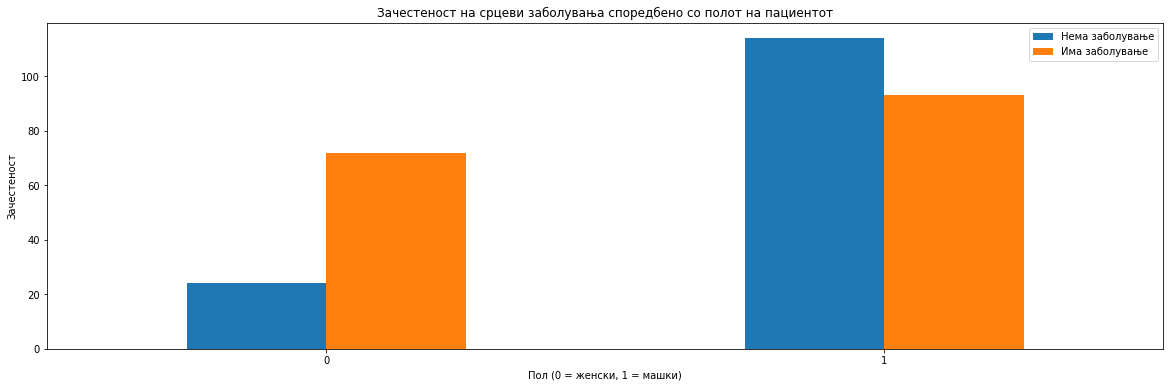

In [10]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Зачестеност на срцеви заболувања споредбено со полот на пациентот')
plt.xlabel('Пол (0 = женски, 1 = машки)')
plt.xticks(rotation=0)
plt.legend(["Нема заболување", "Има заболување"])
plt.ylabel('Зачестеност')
plt.show()

<h1>Создавање на модели</h1>

In [11]:
y = heart.target.values
x_data = heart.drop(['target'], axis = 1)

<h2>Нормализирање на податоците</h2>

In [12]:
#Ги менуваме вредностите да бидат во опсегот од 0 до 1
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

Ќе ги поделиме податоците во размер 80:20. 80 проценти ќе бидат користени за тренинг на моделот, а 20 проценти ќе ги искористиме за тест.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

<h2>Логистичка регресија</h2>

In [14]:
# Логистичка регресија (accuracy и f1_score)
accuracies = {}
f1_scores = {}

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
acc = lr.score(x_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Прецизност на моделот со логистичка регресија {:.2f}%".format(acc))
f1_score_lr = f1_score(pred_lr, y_test)*100

f1_scores['Logistic Regression F1'] = f1_score_lr
print('F1 Score from Logistic Regression: {:.2f}%'.format(f1_score_lr))

lr_scores_cvs = cross_val_score(lr, x_data, y, cv=10, scoring='accuracy')
print('Scores from 10 Fold Cross Validation with Logistic Regression',lr_scores_cvs)

print(max(lr_scores_cvs))
print(min(lr_scores_cvs))

Прецизност на моделот со логистичка регресија 85.25%
F1 Score from Logistic Regression: 87.32%
Scores from 10 Fold Cross Validation with Logistic Regression [0.87096774 0.80645161 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
0.9032258064516129
0.6896551724137931


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Овој модел работи со 85.25% прецизност.

<h2>Random Forest Класификација</h2>

In [15]:
# Random Forest Класификација (accuracy, f1_score и feature importances)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Прецизност на моделот со Random Forest : {:.2f}%".format(acc))
f1_score_rf = f1_score(pred_rf, y_test)*100
f1_scores['Random Forest F1'] = f1_score_rf
print('F1 Score from Logistic Regression: {:.2f}%'.format(f1_score_rf))

rf_scores_cvs = cross_val_score(rf, x_data, y, cv=10, scoring='accuracy')
print('Scores from 10 Fold Cross Validation with Random Forest',rf_scores_cvs)

print(max(rf_scores_cvs))
print(min(rf_scores_cvs))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Прецизност на моделот со Random Forest : 88.52%
F1 Score from Logistic Regression: 89.55%
Scores from 10 Fold Cross Validation with Random Forest [0.74193548 0.77419355 0.93548387 0.90322581 0.90322581 0.73333333
 0.73333333 0.86666667 0.65517241 0.86206897]
0.9354838709677419
0.6551724137931034


Овој модел работи со 88.52% прецизност.

In [16]:
#Feature importances
print('The feature importances using Random Forest Classifier are:',rf.feature_importances_)

#Секоја колона со соодветната важност
for i in range(0, len(heart.columns)-1):
    print(heart.columns[i], rf.feature_importances_[i]*100)

The feature importances using Random Forest Classifier are: [0.09130246 0.04991216 0.09872792 0.05474557 0.08672946 0.00476595
 0.01523087 0.14438163 0.05797206 0.10564719 0.05464249 0.11129001
 0.12465224]
age 9.130245746036355
sex 4.991215587186019
cp 9.872791657426575
trestbps 5.47455749573462
chol 8.672945926321407
fbs 0.47659516765335924
restecg 1.5230866944901815
thalach 14.438162672391991
exang 5.7972060726555235
oldpeak 10.564718913197286
slope 5.464248648161849
ca 11.129001105683594
thal 12.46522431306124


<h2>Support Vector Machine</h2>

In [17]:
# Support Vector Machine Класификација (accuracy, и f1_score

from sklearn.svm import SVC
svm = SVC(random_state = 0)
svm.fit(x_train, y_train)
pred_svc = svm.predict(x_test)
acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Прецизност на моделот со SVM Algorithm: {:.2f}%".format(acc))
f1_score_svc = f1_score(pred_svc, y_test)*100
f1_scores['SVC F1'] = f1_score_svc
print('F1 Score from Logistic Regression: {:.2f}%'.format(f1_score_svc))

svc_scores_cvs = cross_val_score(svm, x_data, y, cv=10, scoring='accuracy')
print('Scores from 10 Fold Cross Validation with SVM',svc_scores_cvs)

print(max(svc_scores_cvs))
print(min(svc_scores_cvs))

Прецизност на моделот со SVM Algorithm: 81.97%
F1 Score from Logistic Regression: 84.93%
Scores from 10 Fold Cross Validation with SVM [0.58064516 0.58064516 0.5483871  0.5483871  0.5483871  0.53333333
 0.53333333 0.53333333 0.55172414 0.55172414]
0.5806451612903226
0.5333333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

Овој модел работи со 81.97% прецизност

<h2>Исцртување на точноста на трите методи</h2>

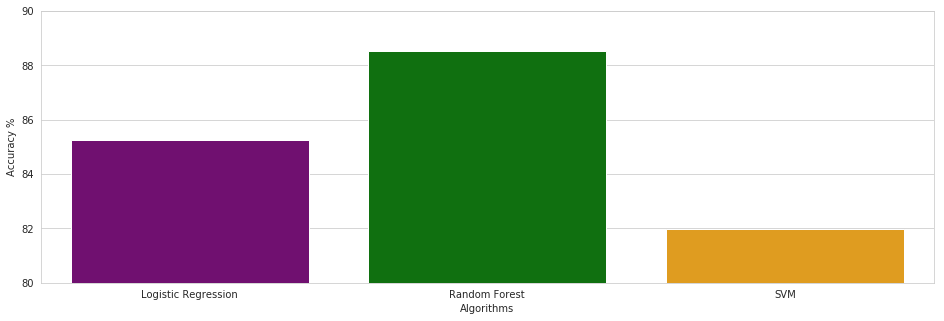

In [18]:
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,2))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.ylim(80, 90)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

<h2>Исцртување на F1 Scores на трите методи</h2>

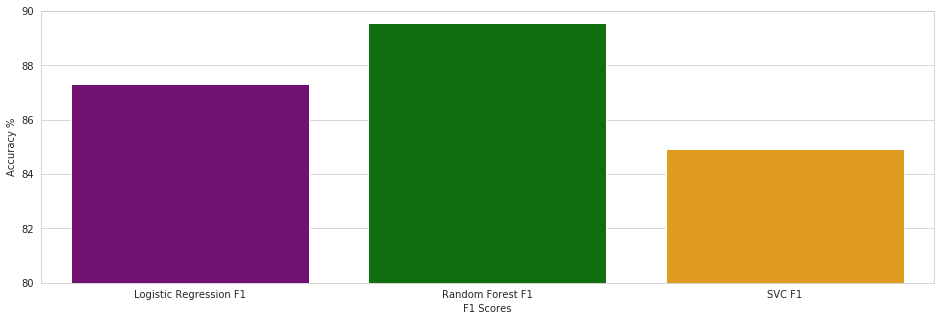

In [19]:
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,2))
plt.ylim(80, 90)
plt.ylabel("Accuracy %")
plt.xlabel("F1 Scores")
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette=colors)
plt.show()

<h2>Confusion Matrices</h2>

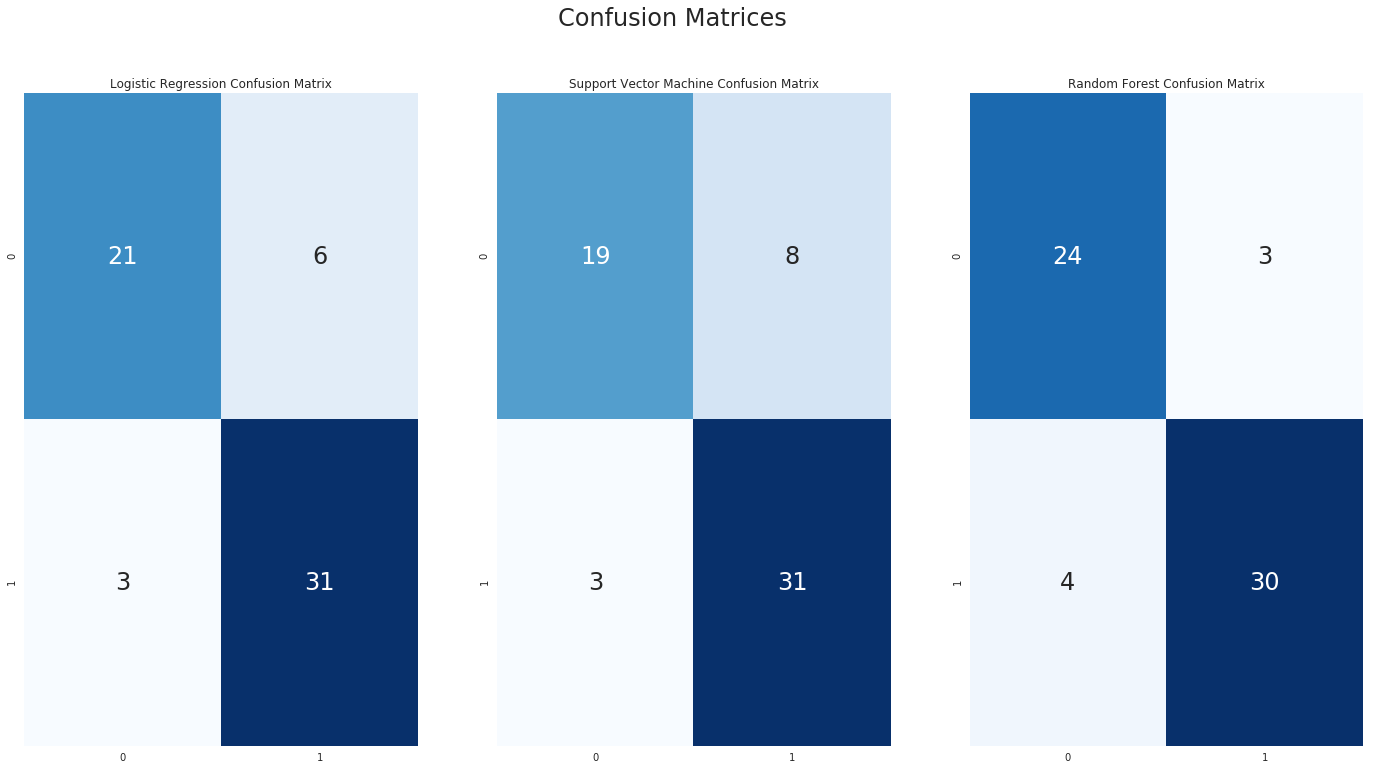

In [20]:
# Исцртување на confusion матрица за сите три методи

from sklearn.metrics import confusion_matrix

y_lr = lr.predict(x_test)
y_svm = svm.predict(x_test)
y_rf = rf.predict(x_test)

cm_lr = confusion_matrix(y_test,y_lr)
cm_svm = confusion_matrix(y_test,y_svm)
cm_rf = confusion_matrix(y_test,y_rf)

plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(1,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

<h3>Опис на проблемот</h3>

Срцевите заболувања опишуваат низа состојби кои влијаат на срцето. Болести под сферата на срцеви заболувања вклучуваат болести на крвните садови, како што е корорнарна артериска болест; проблеми со срцевиот ритам (аритмии); и срцеви мани, меѓу кои и оние кои се присутни при раѓање (вродени срцеви мани).

Терминот "срцеви заболувања" често се користи наизменично со терминот "кардиоваскуларна болест". Кардиоваскуларните заболувања обично се однесуваат на состојби кои вклучуваат стеснети или блокирани крвни садови кои можат да доведат до срцев удар, болка во градите (ангина) или мозочен удар. Други срцеви заболувања, како оние што влијаат на срцевиот мускул, вентилите или ритамот, исто така се сметаат за форми на срцеви заболувања.

Многу форми на срцеви заболувања може да се спречат или третираат со здрав избор на живот

Симптомите на кардиоваскуларни заболувања може да бидат различни кај мажите и жените. На пример, мажите имаат поголема веројатност да имаат болка во градите; жените имаат поголема веројатност да имаат други симптоми заедно со непријатност во градите, како што се скратен здив, гадење и екстремен умор.

Симптомите можат да вклучуваат:

* Болка во градите, затегнатост на градите, притисок на градите и непријатност во градите (ангина)
* Скратен здив
* Болка, вкочанетост, слабост или студ во нозете или рацете ако крвните садови во тие делови на вашето тело се стеснети
* Болка во вратот, вилицата, грлото, горниот дел на стомакот или грбот

(Инфомрациите погоре се од Светската Здравствена Организација - СЗО)

При сите овие информации, битно е да се посочи дека најголемиот убиец на светот се срцевите заболувања. Затоа е многу важно што порано, побрзо и поефикасно да се открие заболувањето, додека има време да се лечи или спречи. Брзиот развој на технологијата ни го овозможува тоа во формата на машинско учење. Притоа, се собираат податоци за луѓето кои имаат и немаат срцеви заболувања и вз база на алгоритам можеме да откриеме со колкава веројатност некој нов пациент би можел да има заболување. Овој датасет е релативно мал но сепак ќе ми послужи како легитимна анализа. Ова е проблем на класификација и има 13 features и 1 target класа, при што има вкупно 303 податоци за пациенти. Од овие 303 пациенти, 165(54.46%) имаат заболување а 138(45.54%) немаат заболување. Бројот на пациентите шти имаат и немаат болест е релативно близок и можам да започнам со обработка на податоците. Притоа, во оваа анализа битен е и полот на пациентот и има 31.68% женски пациенти а 68.32% машки пациенти. Овие податоци се земени од Кливленд и се направени со цел да се индикација за здравјето на срцето.

Притоа, прв чекор кон решавање на овој проблем ми е скалирање на вредостите на целиот датасет во опсег (0,1) со цел олеснување на понатамошниот тек на настани. 

Во моето решение на овој проблем, користам три методи на класификација:

* Логистичка регресија
* Random Forest
* Support Vector Machine

За сите три методи се користат истите четири променливи од функцијијата train_test_split. Со неа целото множество го делам на множество за тестирање и множество за тренинг. Притоа, множеството го делам во размер 80:20. Сите овие три методи се всушност алгоритми за класификација и даваат одреден резултат за нивната прецизност. Заедно со тоа пресметувам и f1 score со кој дознавам колку има true positives/false negatives. Во принцип, не сакам овој аглоритам да означи здрав човек со срцево заболување ниту пак болен човек како здрав. Процентот на f1 score ми кажува колку можам да бидам сигурен во тоа дека прецизноста е сосем точна. Освен тоа, правам и Cross Validation. Ова е доста класична и основна техника за евалуација на моделот. На пример, во мојот слчај ја правам оваа метода 10 пати. Множеството за тренинг тогаш се дели на 10 еднакви дела од кои самиот алгоритам бира еден. Тогаш алгоритмот се тренира на останатите 9 поделоци и се тестира на последниот, и целата оваа постапка се извршува 10 пати. Притоа, ни го враќа процентот на прецизност од секоја итерација. Доколку оваа метода ми даде подобри резултати од нашето првично мерење, можам да ги менувам параметрите и да го достигнам тоа ниво на прецизност. Исто така оваа техника помага многу во однос на тоа дали станува збор за overfitting. 

<h3>Логистичка регресија</h3>

Ова е првиот статистички модел кој го правам. Имено, кога имаме бинарни множества, во случајот дали пациент има или нема болест, еден од најдобрите модели е самата логистичка регресија. Сите податоци може да се најдат на одредено место на одредена сигмоидна функција во вид на издолжено Ѕ по х - оската. Оваа функција дава вредности од 0 до 1 и ни кажува со колкава веројатност новиот пациент би можел да има или да нема заболување врз база на претходниот тренинг. Притоа во моето решение со самиот овој метод добив вредност на точност 85.25%, f1 score 87.32%. Дополнително од 10 Fold Cross Validation сите 10 добиени вредности се во опсегот од 69% до 90% точност. Од тука прозилегува дека сепак не станува збор за overfitting и дека логистичката регресија дава добри резултати и истовремено поставува висока конкуренција за останатите модели.

<h3>Random Forest</h3>

Овој метод претставува подобрена верзија на Decision Tree моделот. Самиот Random Forest може да се класифицира како повеќе дрва на одлуки во едно. Во овој метод по случаен избор се бираат карактеристиките и се прават многу дрва на одлуки. Откако тоа е направено, секој од новите тест пациенти од податочната база поминуваат низ сите овие дрва на одлуки. Откако тоа е завршено, секое дрво го класифицира пациентот, дали има заболување или нема. Потоа се собираат сите информации од сите дрвја и се избира поголемиот број и тогаш новиот пациент се декларира со заболување или без. Бидејќи има многу дрва на одлуки, самиот модел наликува на шума и ние можеме да избереме колку дрва ќе има во неа. Единствено нешто во кое ние не можеме да имаме никаков удел е случајноста на подредувањето на карактеристиките. Ова го прави моделот подобар бидејќи нема да има многу биас во моделот, а со самото тоа може и да се реши проблемот на overfitting. Овој метод, во мојот случај дава точност од 88.52%, f1 score 89.55%, а 10 Fold Cross Validation е од опсег 65% до 94%.

<h3>Support Vector Machine</h3>


SVM е модел кој со оглед на обележаните податоци за обука (надгледувано учење), алгоритмот испорачува оптимална функција која категоризира нови примери. На два димензионални простори, овој функција е линија што ја дели рамнината на два дела каде во секоја класа лежи или на едната или другата страна. На пример во овој случај алгоритамот ги дели пациентите на оние кои имаат заболување или немаат заболување со строга граница. Врз база на пациентите од тренинг множетвото тоа ни кажува во кој дел ќе спаѓаат новите пациенти. Овој метод дава точност од 81.97%, f1 score 84.93% а 10 Fold Cross Validation е од опсег 53% до 55%. Гледаме дека процентот на точност опаѓа кога правам cross validation. Тоа е бидејќи датасетот е доста мал (има само 303 примероци). Златното правило во овие случаји е да се добијат повеќе податоци за да може подобро да се определи прецизноста.

<h3>Заклучок</h3>

На самите графици се приметува дека Random Forest е најдобриот модел од овие три. Тој ги дава најдобрите резултати како и најдобра вредност за f1 score. Исто така, самата Cross Validation ни кажува дека може да се достигне прецизност од 94% што значително би го подобрило моделот. Самите графици и нумерички резултати ни го потврдуваат ова. Бидејќи немам доволно податоци, Cross Validation ни дава доста голем опсег на прецизностите.